1. 병원정보서비스 2021.12.csv 파일을 읽어오기
    - hospital 변수에 저장
1. 지역별 상급종합병원의 수 : 데이터 -> 시각화
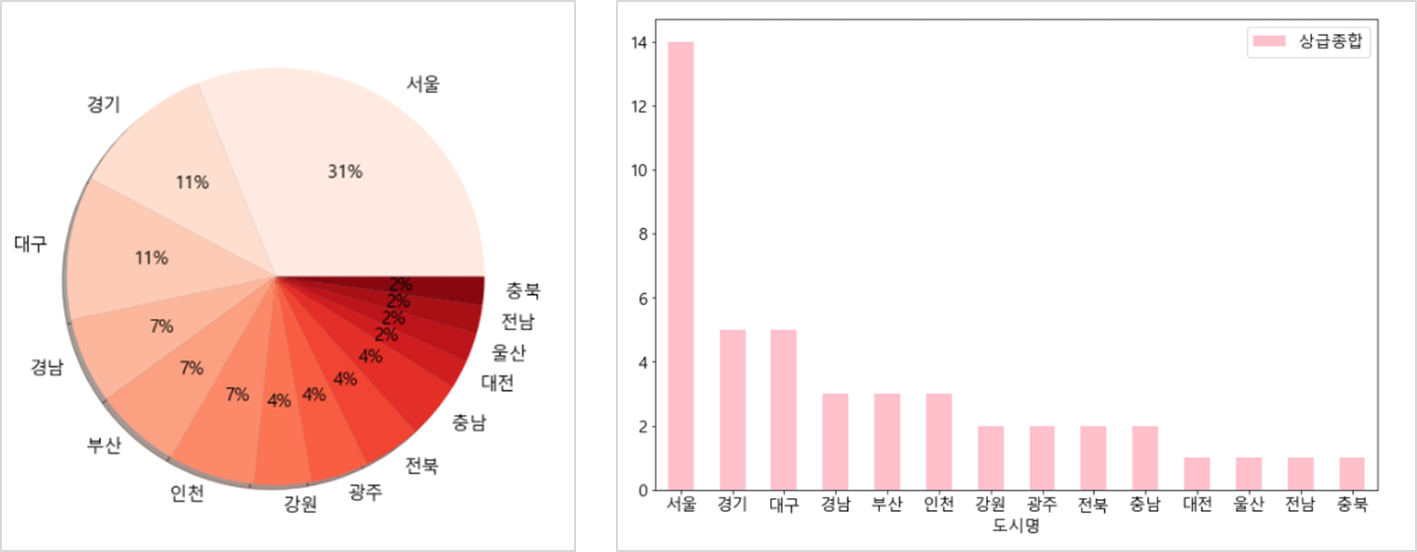

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 읽어오기

In [2]:
hospital = pd.read_csv('병원정보서비스 2021.12.csv', encoding='cp949')

# 데이터 추출

In [3]:
hospital.종별코드명.isin(['상급종합'])

0         True
1         True
2         True
3         True
4         True
         ...  
74751    False
74752    False
74753    False
74754    False
74755    False
Name: 종별코드명, Length: 74756, dtype: bool

In [4]:
hospital_info = hospital.loc[hospital.종별코드명.isin(['상급종합']), ['시도코드명', '종별코드명']]
hospital_info[:2]

,시도코드명,종별코드명
0,대구,상급종합
1,대구,상급종합


In [5]:
hospital_info.columns

Index(['시도코드명', '종별코드명'], dtype='object')

In [6]:
hospital_info.columns = ['도시명', '병원 수']

In [7]:
hospital_info.columns

Index(['도시명', '병원 수'], dtype='object')

In [8]:
hospital_info[:2]

,도시명,병원 수
0,대구,상급종합
1,대구,상급종합


In [9]:
hospital_info.도시명

0     대구
1     대구
2     서울
3     서울
4     서울
5     서울
6     강원
7     서울
8     부산
9     서울
10    대구
11    경남
12    서울
13    인천
14    부산
15    전북
16    충남
17    서울
18    전북
19    대구
20    서울
21    광주
22    광주
23    서울
24    대전
25    경기
26    경남
27    인천
28    울산
29    서울
30    부산
31    충북
32    서울
33    충남
34    경기
35    서울
36    인천
37    강원
38    경기
39    경기
40    경기
41    전남
42    서울
43    경남
44    대구
Name: 도시명, dtype: object

In [10]:
hospital_info.병원 수

SyntaxError: invalid syntax (1202516417.py, line 1)

In [11]:
hospital_info.groupby('도시명')['병원 수'].value_counts()

도시명  병원 수
강원   상급종합     2
경기   상급종합     5
경남   상급종합     3
광주   상급종합     2
대구   상급종합     5
대전   상급종합     1
부산   상급종합     3
서울   상급종합    14
울산   상급종합     1
인천   상급종합     3
전남   상급종합     1
전북   상급종합     2
충남   상급종합     2
충북   상급종합     1
Name: count, dtype: int64

In [12]:
hospital_info.groupby('도시명')['병원 수'].value_counts().sum()

45

In [13]:
hospital_info_count = hospital_info.groupby('도시명').value_counts().unstack()
hospital_info_count

병원 수,상급종합
도시명,
강원,2
경기,5
경남,3
광주,2
대구,5
대전,1
부산,3
서울,14
울산,1


In [14]:
graph = hospital_info_count.sort_values(by='상급종합', ascending=False)
graph

병원 수,상급종합
도시명,
서울,14
경기,5
대구,5
경남,3
부산,3
인천,3
강원,2
광주,2
전북,2


<Axes: >

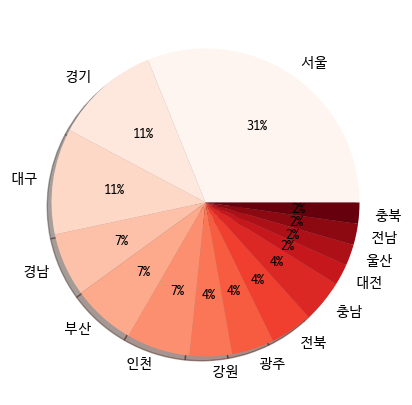

In [15]:
plt.rc('font', family='D2coding')

graph.plot(kind='pie',
           y='상급종합',
           figsize=(5, 5),
           legend=False,
           ylabel='',
           autopct='%.f%%',
           shadow=True,
           #colors=['r', 'g', '#eee'],
           colormap='Reds',
        )

In [16]:
graph.columns

Index(['상급종합'], dtype='object', name='병원 수')

<Axes: xlabel='도시명'>

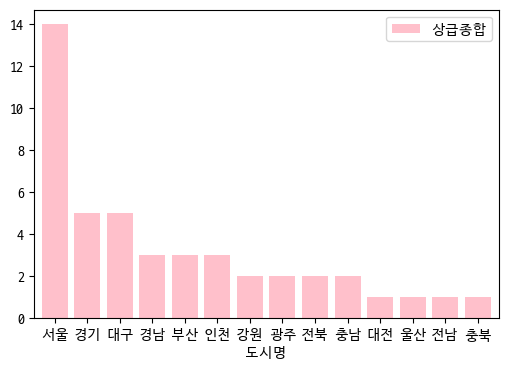

In [17]:
graph.plot(kind='bar',
           y='상급종합',
           rot=0,
           figsize=(6, 4),
           color='pink',
           width=0.8,
          )

- 2021년 12월 기준으로 상급종합병원은 전국적으로 45개가 있으며, 이 중 31%에 해당하는 14개가 서울에 있다.
  광역자치단체 중 경북, 세종, 제주에는 상급종합병원이 없다.

- 암이나 이식 수술 등을 위해서는 상급종합병원이 많은 서울에 거주할 수 밖에 없다.